#### Updating data

In [1]:
from utilities import *
from Guardian import *

ROOT_DIR = os.path.dirname(os.path.abspath("__file__"))
PARENT_DIR = os.path.dirname(ROOT_DIR)

In [2]:
data = guardianScraper()

data.to_csv(PARENT_DIR + "/data/Guardian.csv", index=True)

-> CSV file found with 2935 articles! Latest article date: 2022-07-19
-> Checking articles from latest date onward...
-> API Query |████████████████████████████████████████| (!) 5 in 2.3s (2.16/s) 
-> 3 new articles saved to Guardian.csv! Total articles: 2938


In [3]:
data.head(1)

,URL,Title,Text
Date,,,
2022-07-19,https://www.theguardian.com/world/2022/jul/19/...,Putin arrives in Tehran for Iran-Turkey talks ...,Vladimir Putin has arrived in Tehran on his se...


#### LDA topic identification

In [4]:
doc_topic, topic_word, vocabulary = learn_topics(data, topicnum=30, vocabsize=10000, num_iter=2000) 

INFO:lda:n_documents: 2938
INFO:lda:vocab_size: 10000
INFO:lda:n_words: 1302716
INFO:lda:n_topics: 30
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihood: -15749392
INFO:lda:<100> log likelihood: -11129536
INFO:lda:<200> log likelihood: -11040875
INFO:lda:<300> log likelihood: -11013903
INFO:lda:<400> log likelihood: -11004468
INFO:lda:<500> log likelihood: -10988993
INFO:lda:<600> log likelihood: -10984741
INFO:lda:<700> log likelihood: -10983395
INFO:lda:<800> log likelihood: -10978994
INFO:lda:<900> log likelihood: -10972585
INFO:lda:<1000> log likelihood: -10973737
INFO:lda:<1100> log likelihood: -10967999
INFO:lda:<1200> log likelihood: -10961513
INFO:lda:<1300> log likelihood: -10958950
INFO:lda:<1400> log likelihood: -10952109
INFO:lda:<1500> log likelihood: -10953673
INFO:lda:<1600> log likelihood: -10951152
INFO:lda:<1700> log likelihood: -10947954
INFO:lda:<1800> log likelihood: -10944052
INFO:lda:<1900> log likelihood: -10943747
INFO:lda:<1999> log likelihood: -10941275


In [5]:
topics = []
for i in range(len(data)):
    topics.append(doc_topic[i].argmax())

In [6]:
for i in range(10):
    print(f"{data.iloc[i][1]} TOPIC: {doc_topic[i].argmax()}")

Putin arrives in Tehran for Iran-Turkey talks over Ukraine TOPIC: 5
Ukrainian boy held hostage by Russia tells of cleaning up torture rooms TOPIC: 16
Russia-Ukraine war at a glance: what we know on day 146 of the invasion TOPIC: 22
Putin arrives in Tehran for Iran-Turkey talks over Ukraine TOPIC: 22
Human rights groups criticise EU’s Azerbaijan gas deal TOPIC: 14
Russia-Ukraine war at a glance: what we know on day 146 of the invasion TOPIC: 22
North Korean labour could be sent to rebuild Donbas, Russian ambassador says TOPIC: 15
‘They have come to destroy us’: Ukrainians on the frontline in Donbas TOPIC: 6
The Guardian view on Italy’s political crisis: Draghi should stay for now  TOPIC: 10
‘They have come to destroy us’: Ukrainians on the frontline in Donbas TOPIC: 6


In [7]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocabulary)[np.argsort(topic_dist)][:-8:-1]
    print("Topic {}: {}".format(i, " ".join(topic_words)))


Topic 0: mariupol said russian city the civilians russia
Topic 1: sanctions russian russia the eu bank banks
Topic 2: it we people like but he don
Topic 3: australia australian government the morrison israel minister
Topic 4: ukraine russian military forces weapons russia us
Topic 5: food grain ukraine the world sea black
Topic 6: russian ukraine ukrainian said russia region forces
Topic 7: media russian news the ukraine russia said
Topic 8: city kyiv russian said people ukrainian the
Topic 9: russian putin war russia the soviet ukraine
Topic 10: it in but time new this that
Topic 11: us biden president zelenskiy putin trump the
Topic 12: prices the said year global inflation price
Topic 13: ukraine putin russia war the nato west
Topic 14: gas oil energy russian the russia europe
Topic 15: china nuclear russia us the un beijing
Topic 16: said the russian soldiers they he guardian
Topic 17: war crimes the bucha civilians international russian
Topic 18: said ukraine russian ukrainian war

In [8]:
source = "Guardian"
save_topicmodel(doc_topic, topic_word, vocabulary, source)

('/Users/r2/Code/ukraine-media/results/GuardianTopicMixtures.txt',
 '/Users/r2/Code/ukraine-media/results/GuardianTopics.txt',
 '/Users/r2/Code/ukraine-media/results/GuardianVocab.txt')

In [9]:
period = 7
novelties, transiences, resonances = novelty_transience_resonance(doc_topic, period)

for index in range(0,period):
    transiences.insert(0, 0)
    transiences.append(0)
    novelties.insert(0, 0)
    novelties.append(0)
    resonances.insert(0, 0)
    resonances.append(0)

save_novel_trans_reson(novelties, transiences, resonances, source)

/Users/r2/Code/ukraine-media/scrapers/utilities.py:142: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  np.savetxt(outpath, np.vstack(zip(novelties, transiences, resonances)))


In [15]:
ntr_data = data
ntr_data['Novelty'] = novelties
ntr_data['Transience'] = novelties
ntr_data['Resonance'] = resonances
ntr_data['Topic'] = topics

ntr_data.to_csv(PARENT_DIR + "/data/"+ source + "_ntr.csv")
ntr_data.head(5)

,URL,Title,Text,Novelty,Transience,Resonance,Topic
Date,,,,,,,
2022-07-19,https://www.theguardian.com/world/2022/jul/19/...,Putin arrives in Tehran for Iran-Turkey talks ...,Vladimir Putin has arrived in Tehran on his se...,0.0,0.0,0.0,5
2022-07-19,https://www.theguardian.com/world/2022/jul/19/...,Ukrainian boy held hostage by Russia tells of ...,A 16-year-old Ukrainian boy has described how ...,0.0,0.0,0.0,16
2022-07-19,https://www.theguardian.com/world/2022/jul/19/...,Russia-Ukraine war at a glance: what we know o...,The European Union is set to add Russia’s big...,0.0,0.0,0.0,22
2022-07-19,https://www.theguardian.com/world/2022/jul/19/...,Putin arrives in Tehran for Iran-Turkey talks ...,Vladimir Putin has arrived in Tehran on his se...,0.0,0.0,0.0,22
2022-07-19,https://www.theguardian.com/world/2022/jul/19/...,Human rights groups criticise EU’s Azerbaijan ...,Human rights groups have criticised an EU deal...,0.0,0.0,0.0,14


In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [19]:
ntr_data = pd.read_csv(PARENT_DIR + "/data/Guardian_ntr.csv", parse_dates=['Date'], index_col= ['Date'])
ntr_data.head()
#print(len(ntr_data))

2938


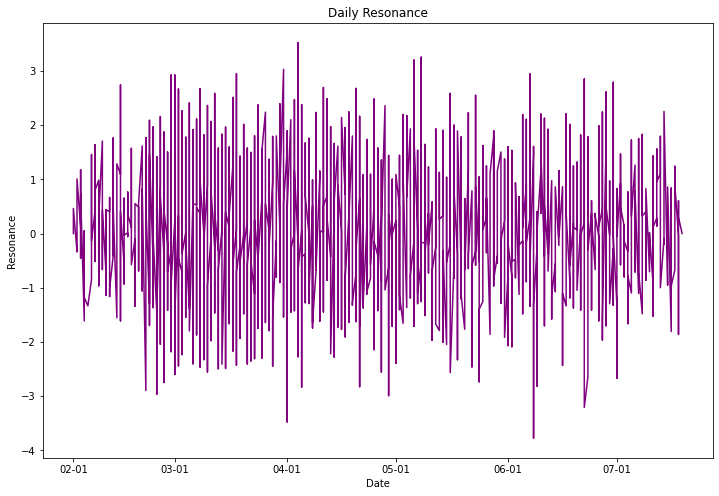

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(ntr_data.index.values,
       ntr_data['Resonance'],
       color='purple')

ax.set(xlabel="Date",
       ylabel="Resonance",
       title="Daily Resonance")

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)